<a href="https://colab.research.google.com/github/ge35tay/test/blob/master/%5BSkeleton%5D_Lecture_9_Gaussian_Processes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Problem Description:** 
Use the Gaussian Process method to approximate the cosine function in the interval *x* = [-10, 10]. Use training samples *X_train* = {-10, -6, -3, 0, 3, 6, 10}, *y_train* = cos(*X_train*). Assume that all training samples are noise-free. Use the radial basis kernel function with a length scale of *l* = 1.  

Your task is to plot the approximation and standard deviations at query points within the range [-10, 10] generated using a 0.1 sample interval (i.e., we want to query values of *x* = {-10, -9.9, -9.8, ... }. 


## **0) Import Python libraries (NumPy, SciPy, scikit-learn, etc.)**

In [1]:
import numpy as np
import matplotlib.pyplot as plt

## **1) Define necessary variables** 


In [3]:
# X_train - values as training examples, Y_train - output of function using training examples:
X_train = [-10, -6, -3, 0, 3, 6, 10]
Y_train = np.cos(X_train)

# X_test - values used as query points with given sample interval:
#  -- HINT: is there some function in NumPy that allows us to get a set of values and specify an interval?
X_test = np.arange(-10, 10, 0.1)
Y_test = np.cos(X_test)

# initialize vectors to store predicted values (mean) and standard deviation (variance) at each query point:
# -- HINT: make sure that it has the same dimensions as X_test
mean = np.zeros(X_test.shape)
variance = np.zeros(X_test.shape)

# define length-scale for RBK function:
l = 1

# define noise value sigma:
sigma = 0

## **2) Execute Gaussian process**



#### ***2.1) Complete Gaussian process definition:***
Here, you will need to implement the following functions:

- `radial_basis_kernel_function(x_1, x_2, l)` -- this function uses the values or samples `x_1` and `x_2` to compute the kernel function based on the typical RBKF definition using the length-scale value `l`.
- `create_covariance_matrix(X1, X2, l)` -- this function will use the RBKF defined above to create a covariance matrix (or kernel vector) using length-scale `l`. Be sure to note the order in which you put `X1` and `X2`, as you need to make sure that the dimensions match! (_Hint: think about exercise 1 from this week's exercise_).
- `compute_mean(X_train, Y_train, x, l, sigma)` -- this function will predict the value of the distribution at a given query point; this is done by computing the mean of the learned distribution using the training samples and outputs (`X_train` and `Y_train` that we said we have) and identifying the mean value at the query point `x`. Here, we also provide the noise constant as `sigma` and the length-scale `l`.
- `compute_variance(X_train, x, l, sigma)` -- this function will compute the variance of the learned distribution using the training points (`X_train`) and a given query point `x`. Here, we also provide the noise constant as `sigma` and the length-scale `l`

In [14]:
# NOTE: function to compute kernel function using provided values of x and length-scale l:
def radial_basis_kernel_function(x_1, x_2, l):
    # HINT: how is the radial basis kernel function defined?
    kernel_value = np.exp(-((x_1 - x_2)**2)/(2*l**2))
    return kernel_value

# NOTE: function to compute the Gram matrix (Bishop), which will measure kernel values for all points in X_1 and X_2
def create_covariance_matrix(X_1, X_2, l):
    # HINT: remember that you need to compute the kernel function for all values in X_1 and X_2; what size should the output be for different inputs?

    # initialize the matrix based on the dimensions of X_1 and X_2:
    kernel_matrix = np.zeros(len(X_1), len(X_2))
    
    # go through all values in the set of datapoints X1:
    for i in range(len(X_1)):
        # go through all values in the set of datapoints X2:
        for j in range(len(X_2)):
            # compute the value of the kernel function using i-th value in X1 and j-th value in X2:
            kernel_matrix[i,j] = radial_basis_kernel_function(X_1[i], X_2[i], l)

    return kernel_matrix

def compute_mean(X_train, Y_train, x, l, sigma):
    # HINT: how is the formulation for computing the mean like? What parts do you need? What operations are needed?
    K_star = create_covariance_matrix(X_train, x, l)
    K = create_covariance_matrix(X_train, X_train, l)

    return K_star.T.dot(inv(K + sigma^2*np.eye(K.shape[0]))).dot(Y_train)

def compute_variance(X_train, x, l, sigma):
    # HINT: how is the formulation for computing the variance like? What parts do you need? What operations are needed?
    K = create_covariance_matrix(X_train, X_train, l)
    K_star = create_covariance_matrix(X_train, x, l)
    K_starstar = create_covariance_matrix(x, x, l)
    return K_starstar - K_star.T.dot(inv(K + sigma^2*np.eye(K.shape[0]))).dot(K_star)

#### ***2.2) Compute the prediction (mean) and standard deviation (variance) at each query point using training points:***

In [15]:
# predict the value at each query point (with compute_mean(...) function) and also note the variance at the query point (with compute_variance(...) 
for i in range(X_test.shape[0]):
    # take a single query point and treat it as its own vector:
    x = X_test[i]

    # compute the mean and store it in the array of computed mean values:
    mean[i] = compute_mean(X_train, Y_train, x, l, sigma)

    # compute the variance and store it in the array of computed variance values:
    variance[i] = compute_variance(X_train, x, 1, sigma)

TypeError: ignored

#### ***2.3) Plot predicted and expected results:***

In [ ]:
plt.figure(figsize=(24,8))

# plot the actual expected function values at each query point:
plt.plot(X_test,Y_test,'k', label='target function')
plt.xlabel('input values (query points)')
plt.ylabel('output values (cosine function)')

# plot markings to show the location of the training sample points:
plt.plot(X_train,Y_train,'rX', markersize=14, label='training points')

# plot predicted mean values and show the variance as error bars:
plt.errorbar(X_test,mean, yerr=2*np.sqrt(np.abs(variance)), label='approximation and standard deviation', marker='.', mec='blue', ecolor='grey')

plt.legend()
plt.show()

### **What you should see is the following plot:***

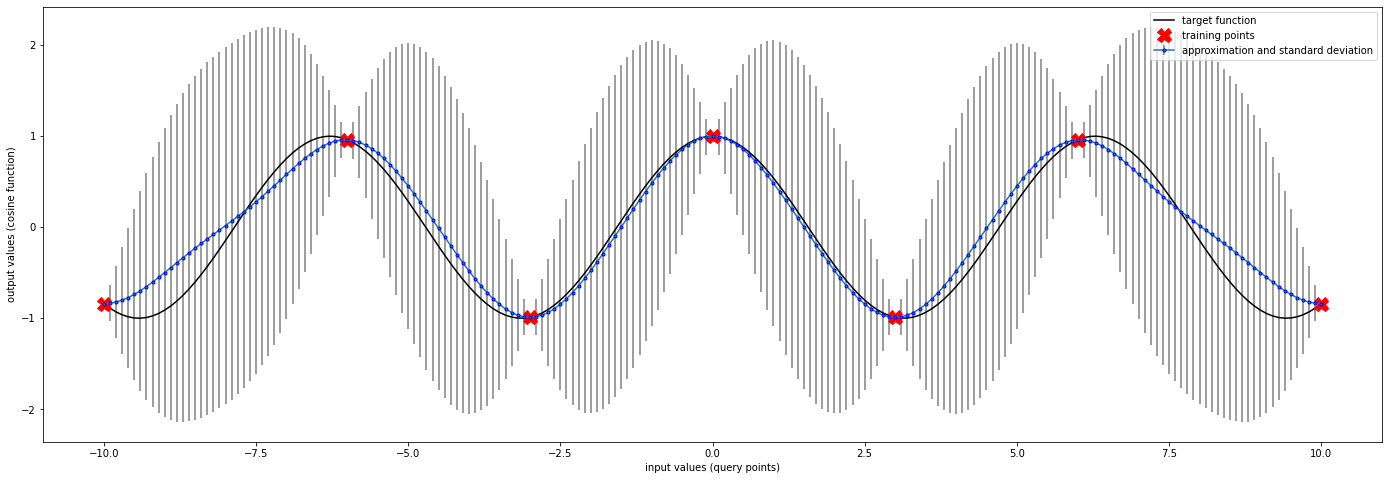

## **Questions to think about:**
- Do you see that the approximation is very close to the actual shape of the cosine wave function? Although the variance seems high, the few points we used as training points were sufficient to acquire this approximation. 
- What do you think would happen if you added more training points? What do you think would happen if you removed training points?
- What happens if you add noise to the distribution (i.e. make `sigma^2` greater than 0)?

## **Further Reading**
For more information on the topic of Gaussian processes, please refer to:

- Bishop's _Pattern Recognition and Machine Learning_ book, Chapter 6.
- Rasmussen and Williams, _Gaussian Processes for Machine Learning_ - http://www.gaussianprocess.org/gpml/chapters/RW.pdf
- Nando de Freitas, _Introduction to Gaussian processes_ lecture - https://youtu.be/4vGiHC35j9s
- Peter Roelants, _Gaussian processes_ - https://peterroelants.github.io/posts/gaussian-process-tutorial/